# Import Python Libraries

In [0]:
import numpy as np
import math
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Import R Libraries

In [0]:
%r
library(SparkR)


Attaching package: ‘SparkR’

The following object is masked _by_ ‘.GlobalEnv’:

    setLocalProperty

The following objects are masked from ‘package:stats’:

    cov, filter, lag, na.omit, predict, sd, var, window

The following objects are masked from ‘package:base’:

    as.data.frame, colnames, colnames<-, drop, endsWith, intersect,
    rank, rbind, sample, startsWith, subset, summary, transform, union


# Import Data

In [0]:
data_raw = pd.read_csv(r'https://raw.githubusercontent.com/mattlibonati/Machine-Learning/main/ames_sample.csv')
data_raw

,Unnamed: 0,SID,PID,LotFrontage,LotArea,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,WoodDeckInd,PorchInd,QualityIndex,I2006,I2007,I2008,I2009,I2010,u,train
0,0,1,526301100,141,31770,Corner,NAmes,1Story,6,5,...,1.0,1.0,30,0.0,0.0,0.0,0.0,1.0,0.741664,0.0
1,1,2,526350040,80,11622,Inside,NAmes,1Story,5,6,...,1.0,1.0,30,0.0,0.0,0.0,0.0,1.0,0.888332,0.0
2,2,3,526351010,81,14267,Corner,NAmes,1Story,6,6,...,1.0,1.0,36,0.0,0.0,0.0,0.0,1.0,0.006774,1.0
3,3,4,526353030,93,11160,Corner,NAmes,1Story,7,5,...,0.0,1.0,35,0.0,0.0,0.0,0.0,1.0,0.234958,1.0
4,4,5,527105010,74,13830,Inside,Gilbert,2Story,5,5,...,1.0,1.0,25,0.0,0.0,0.0,0.0,1.0,0.500846,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1130,2924,923250060,80,17400,Inside,Mitchel,1Story,5,5,...,1.0,1.0,25,1.0,0.0,0.0,0.0,0.0,0.609243,1.0
1131,1131,2926,923275080,37,7937,CulDSac,Mitchel,SLvl,6,6,...,1.0,1.0,36,1.0,0.0,0.0,0.0,0.0,0.645906,1.0
1132,1132,2928,923400125,62,10441,Inside,Mitchel,SFoyer,5,5,...,1.0,1.0,25,1.0,0.0,0.0,0.0,0.0,0.155895,1.0
1133,1133,2929,924100070,77,10010,Inside,Mitchel,1Story,5,5,...,1.0,1.0,25,1.0,0.0,0.0,0.0,0.0,0.537924,1.0


# Data Preprocessing

In [0]:
# limit rows in dataframes to model vars
processed = data_raw[['TotalSqftCalc','TotalBathCalc','LotFrontage','LotArea','SalePrice']]

# obtain natural logs
processed['log_SalePrice'] = np.log1p(processed['SalePrice'])
processed['sqrt_SalePrice'] = np.sqrt(processed['SalePrice'])

# this creates a Spark DF than can be referenced by both Python and R
spark.createDataFrame(processed).createOrReplaceTempView('processed') 
spark.sql('select * from processed').limit(5).display()

<command-1902354085927197>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed['log_SalePrice'] = np.log1p(processed['SalePrice'])
<command-1902354085927197>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed['sqrt_SalePrice'] = np.sqrt(processed['SalePrice'])


TotalSqftCalc,TotalBathCalc,LotFrontage,LotArea,SalePrice,log_SalePrice,sqrt_SalePrice
2295,2.0,141,31770,215000,12.278397958261774,463.6809247747852
1508,1.0,80,11622,105000,11.561725152903833,324.037034920393
2252,1.5,81,14267,172000,12.055255569732177,414.7288270665544
3175,3.5,93,11160,244000,12.404927602627597,493.9635614091388
2420,2.5,74,13830,189900,12.15425816271595,435.7751713900185


In [0]:
processed.describe()

,TotalSqftCalc,TotalBathCalc,LotFrontage,LotArea,SalePrice,log_SalePrice,sqrt_SalePrice
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,2121.792070,2.337885,77.044053,10978.896035,197211.485463,12.129999,436.999721
std,709.215433,0.743977,18.925590,7407.311070,77324.319438,0.339352,79.045774
min,825.000000,1.000000,36.000000,3182.000000,62383.000000,11.041064,249.765890
25%,1630.500000,2.000000,65.000000,8669.500000,142187.500000,11.864909,377.077569
50%,1955.000000,2.500000,75.000000,10004.000000,177500.000000,12.086732,421.307489
75%,2486.000000,3.000000,85.000000,11850.500000,229900.000000,12.345404,479.478872
max,5771.000000,4.500000,313.000000,215245.000000,755000.000000,13.534474,868.907360


# Part 1:  Decomposing the Home Value
Fit the MLR model with the response variable SalePrice and the predictor variables TotalSqftCalc, TotalBathCalc, LotFrontage, and LotArea.

In [0]:
# fit simple linear regression model
mlr_1 = ols('SalePrice ~ TotalSqftCalc + TotalBathCalc + LotFrontage + LotArea',
                   data=processed).fit()
  
# display model summary
print(mlr_1.summary())
# display model parameters
print('\nModel Coefficients:\n',mlr_1.params)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     552.2
Date:                Sun, 29 Jan 2023   Prob (F-statistic):          5.55e-264
Time:                        20:57:10   Log-Likelihood:                -13770.
No. Observations:                1135   AIC:                         2.755e+04
Df Residuals:                    1130   BIC:                         2.758e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.311e+04   6423.640     -5.154

In [0]:
def model_1(x1,x2,x3,x4):
  return f'Estimated Home Price of Typical Home = ${round(-33105.985385 + (x1*61.489679) + (x2*24873.698769) + (x3*451.961049) + (x4*0.626328),2)}'

We will consider the ‘typical’ house in Ames, IA to have the following values for the model features. 
* TotalSqftCalc = 2100  
* TotalBathCalc = 2.5     
* LotFrontage = 75    
* LotArea = 11000

Let’s compute ‘model scores’ (home price estimates) for this typical house and some variants on this house. The starter script for this assignment will show you how to use matrix multiplication in R to compute these values.

<b> Question 1:</b> Using Model #1 compute the estimated home price for the typical home with (TotalSqftCalc, TotalBathCalc, LotFrontage,    LotArea) = (2100, 2.5, 75, 11000)

In [0]:
model_1(2100, 2.5, 75, 11000)

Out[7]: 'Estimated Home Price of Typical Home = $198993.27'

<b> Question 2:</b> Add 400 sqft to our typical home.  Using Model #1 compute the estimated home price for a home with (TotalSqftCalc, TotalBathCalc, LotFrontage, LotArea) = (2500, 2.5, 75, 11000).

In [0]:
model_1(2500, 2.5, 75, 11000)

Out[8]: 'Estimated Home Price of Typical Home = $223589.15'

<b> Question 3:</b> Add 1.5 bathrooms to our typical home.  Using Model #1 compute the estimated home price for a home with (TotalSqftCalc, TotalBathCalc, LotFrontage,    LotArea) = (2100, 4.0, 75, 11000).

In [0]:
model_1(2100, 4.0, 75, 11000)

Out[9]: 'Estimated Home Price of Typical Home = $236303.82'

<b> Question 4:</b> Add 4000 sqft of lot size to our typical home.  Using Model #1 compute the estimated home price for a home with (TotalSqftCalc, TotalBathCalc, LotFrontage, LotArea) = (2100, 2.5, 75, 15000).

In [0]:
model_1(2100, 2.5, 75, 15000)

Out[10]: 'Estimated Home Price of Typical Home = $201498.59'

# Part 2:  How should we interpret a regression model for log(SalePrice)?

Fit the MLR model with the response variable log(SalePrice) and the predictor variables TotalSqftCalc, TotalBathCalc, LotFrontage, and LotArea

In [0]:
# fit simple linear regression model
mlr_2 = ols('log_SalePrice ~ TotalSqftCalc + TotalBathCalc + LotFrontage + LotArea',
                   data=processed).fit()
  
# display model summary
print(mlr_2.summary())
# display model parameters
print('\nModel Coefficients:\n',mlr_2.params)

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     588.8
Date:                Sun, 29 Jan 2023   Prob (F-statistic):          1.67e-274
Time:                        20:57:20   Log-Likelihood:                 255.78
No. Observations:                1135   AIC:                            -501.6
Df Residuals:                    1130   BIC:                            -476.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.0828      0.028    401.655

In [0]:
def model_2(x1,x2,x3,x4):
  return [f'Estimated Home Price of Typical Home = ${math.exp(round(11.082772 + (x1*0.000214) + (x2*0.172538) + (x3*0.002133) + (x4*0.000002),4))}',round(11.082772 + (x1*0.000214) + (x2*0.172538) + (x3*0.002133) + (x4*0.000002),4)]

<b> Question 5: </b> Jensen’s Inequality – f( E[X] ) <= E[ f(X) ] for a convex function f Switching back and forth between the original scale and the log-scale can cause some confusion in 
greenhorns. Some of that confusion can be explained by Jensen’s Inequality. The confusion arises because we expect quantities to be equal, when in fact they will not be. <br>
<br>
Compute the exp(mean(log(ames.df$SalePrice))) and note that it is less than mean(exp(log(ames.df$SalePrice))) = mean(ames.df$SalePrice).

In [0]:
%r

processed_r <- SparkR::sql('select * from processed')
processed_r <- collect(processed_r)

cat("exp(mean(log(processed_r$SalePrice))): ", exp(mean(log(processed_r$SalePrice))),"\nmean(exp(log(processed_r$SalePrice))) :", mean(exp(log(processed_r$SalePrice))), "\nmean(processed_r$SalePrice): ", mean(processed_r$SalePrice))

exp(mean(log(processed_r$SalePrice))):  185348.6 
mean(exp(log(processed_r$SalePrice))) : 197211.5 
mean(processed_r$SalePrice):  197211.5

<b> Question 6: </b> Using Model #2 compute the estimated home price for the typical home with  (TotalSqftCalc, TotalBathCalc, LotFrontage,    LotArea) = (2100, 2.5, 75, 11000).  Name this value  v.0.

In [0]:
v0 = model_2(2100,2.5,75,11000)
print(v0)

['Estimated Home Price of Typical Home = $188245.07814344505', 12.1455]


<b> Question 7: </b> Add 400 sqft to our typical home.  Using Model #2 compute the estimated home price for a home with (TotalSqftCalc, TotalBathCalc, LotFrontage,    LotArea) = (2500, 2.5, 75, 11000).  Name this value v.1.

In [0]:
v1 = model_2(2500,2.5,75,11000)
print(v1)

['Estimated Home Price of Typical Home = $205068.6335719127', 12.2311]


<b> Question 8: </b> Compute the percent increase in the home value from adding 400 sqft to our typical home. Verify your answer by computing exp(v.1) / exp(v.0).  Note that the percent increase is the decimal portion, i.e. a factor of 1.23 means a 23% increase.

In [0]:
print('exp(0.000214*400): ',round(math.exp(0.000214*400),4))
print('exp(v1)/exp(v0): ',round(math.exp(v1[1]) / math.exp(v0[1]),4))

exp(0.000214*400):  1.0894
exp(v1)/exp(v0):  1.0894


<b> Question 9: </b> Add 1.5 bathrooms to our typical home.  Using Model #2 compute the estimated home price for a home with (TotalSqftCalc, TotalBathCalc, LotFrontage,    LotArea) = (2100, 4.0, 75, 11000). Name this value v.2.

In [0]:
v2 = model_2(2100,4.0,75,11000)
print(v2)

['Estimated Home Price of Typical Home = $243847.9123753863', 12.4043]


<b> Question 10: </b> Compute the percent increase in the home value from adding 1.5 bathrooms to our typical home.  Verify your answer by computing exp(v.2) / exp(v.0).  Note that the percent  increase is the decimal portion, i.e. a factor of 1.23 means a 23% increase.

In [0]:
print('exp(0.172538*1.5): ',round(math.exp(0.172538*1.5),4))
print('exp(v2)/exp(v0): ',round(math.exp(v2[1]) / math.exp(v0[1]),4))

exp(0.172538*1.5):  1.2954
exp(v2)/exp(v0):  1.2954


<b> Question 11: </b> Add 4000 sqft of lot size to our typical home.  Using Model #2 compute the estimated home price for a home with (TotalSqftCalc, TotalBathCalc, LotFrontage,    LotArea) = (2100, 2.5, 75, 15000).  Name this value v.3.

In [0]:
v3 = model_2(2100,2.5,75,15000)
print(v3)

['Estimated Home Price of Typical Home = $189757.07870685167', 12.1535]


<b> Question 12: </b> Compute the percent increase in the home value from adding 4000 sqft of lot size to our typical home. Verify your answer by computing exp(v.3) / exp(v.0).  Note that the percent increase is the decimal portion, i.e. a factor of 1.23 means a 23% increase.

In [0]:
print('exp(0.000002*4000): ',round(math.exp(0.000002*4000),4))
print('exp(v3)/exp(v0): ',round(math.exp(v3[1]) / math.exp(v0[1]),4))

exp(0.000002*4000):  1.008
exp(v3)/exp(v0):  1.008


# Part 3:  Why did we transform the response variable? 
Frequently a highly skewed response variable is transformed towards symmetry. The two typical transformations are the log transformation and the square root transformation. The square root 
transformation is used when the response variable contains zeros. 
<br><br>
We can compute the skewness of a variable using the skewness() function in the moments package. Install the package in order to complete the questions in this section.

In [0]:
%r
library(moments)


Attaching package: ‘moments’

The following objects are masked from ‘package:SparkR’:

    kurtosis, skewness


In [0]:
%r
cat("Skewness of SalePrice: ",skewness(processed_r$SalePrice))
cat("\nSkewness of log(SalePrice): ",skewness(processed_r$log_SalePrice))
cat("\nSkewness of Sqrt(SalePrice): ",skewness(processed_r$sqrt_SalePrice))

Skewness:  1.928376
Skewness:  0.6652914
Skewness:  1.212218

<b> Question 13: </b> Produce a histogram with n=40 bins and compute the skewness for SalePrice. Color the histogram grey. Paste the histogram into the template.

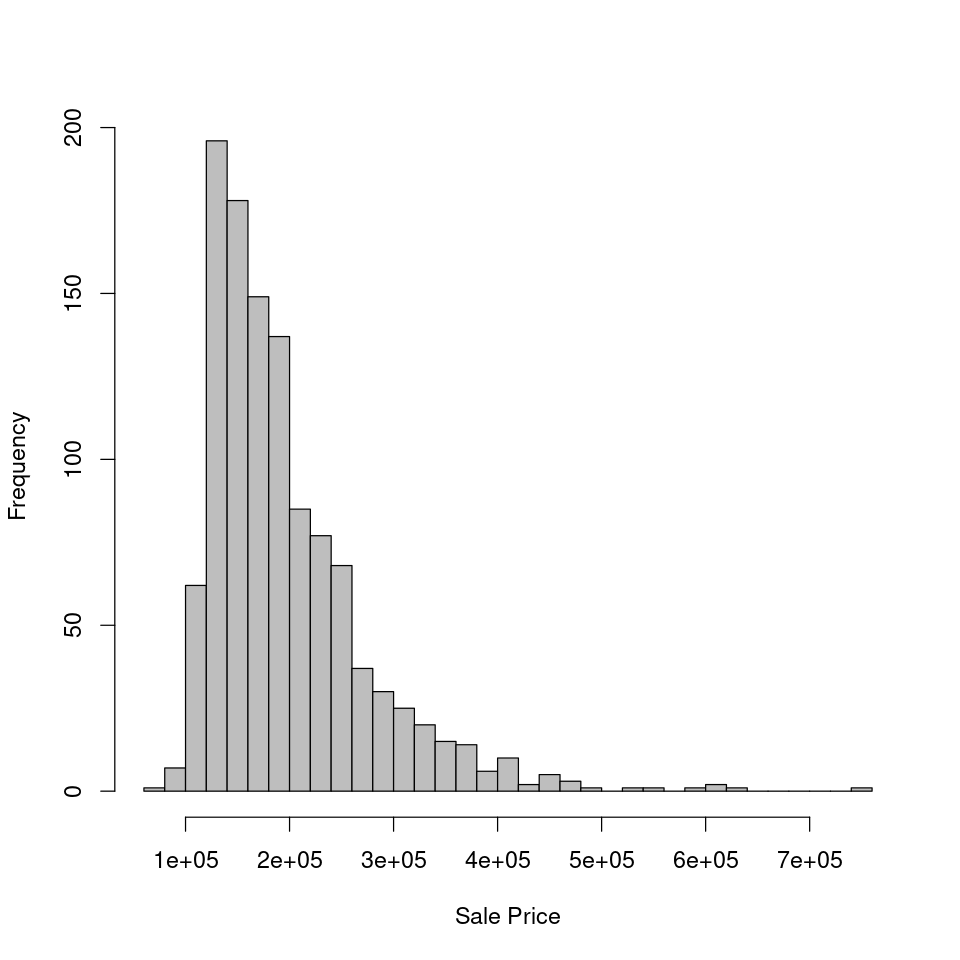

In [0]:
%r
hist(processed_r$SalePrice,xlab='Sale Price', main='', breaks=40, col='grey')

<b> Question 14: </b> Produce a histogram with n=40 bins and compute the skewness for log(SalePrice). Color the histogram blue. Paste the histogram into the template.

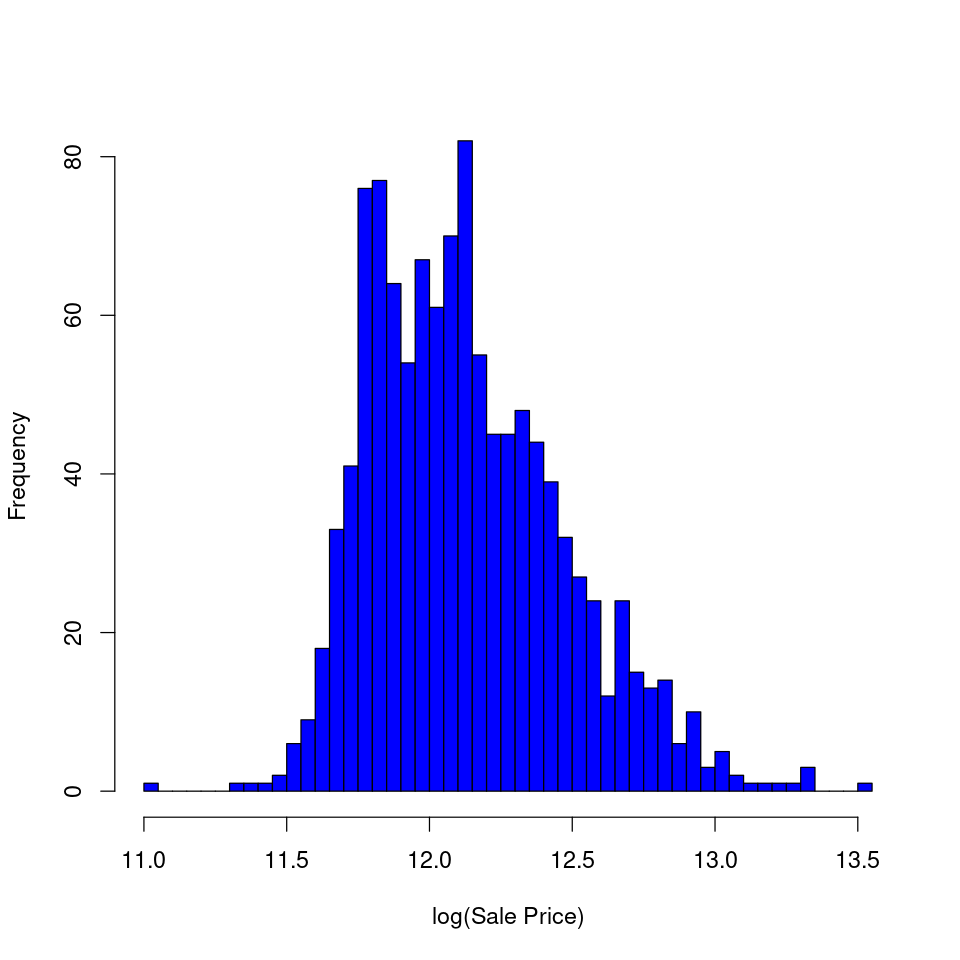

In [0]:
%r
hist(processed_r$log_SalePrice,xlab='log(Sale Price)', main='', breaks=40, col='blue')

<b> Question 15: </b> Produce a histogram with n=40 bins and compute the skewness for sqrt(SalePrice). Color the histogram grey. Paste the histogram into the template.

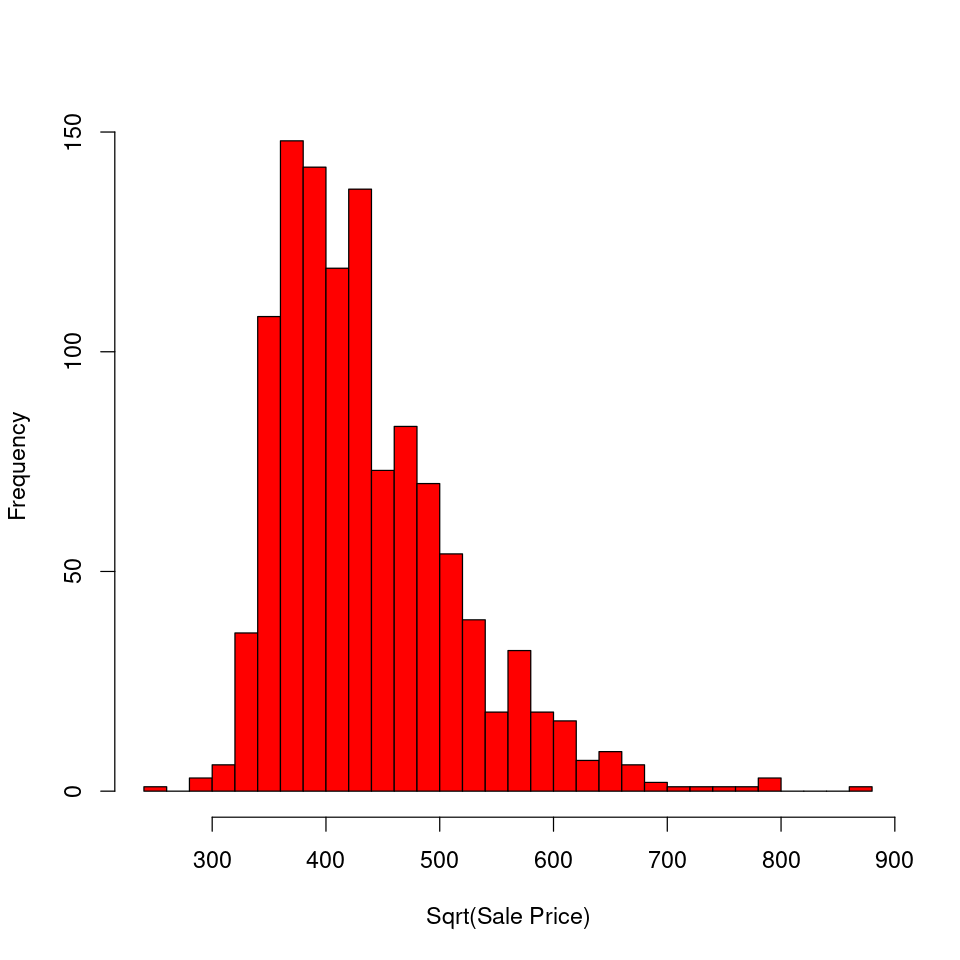

In [0]:
%r
hist(processed_r$sqrt_SalePrice,xlab='Sqrt(Sale Price)', main='', breaks=40, col='red')

# Part 4:  The Box-Cox Transformation 
The Box-Cox transformation is available in the forecast package.  Install the forecast package and use the BoxCox.lambda() function to compute the optimal lambda for the Box-Cox transformation  and the BoxCox() function to make the optimal Box-Cox transformation of SalePrice.

In [0]:
%r
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

In [0]:
%r
# Compute the optimal lambda;
lambda.hat <- BoxCox.lambda(processed_r$SalePrice)

<b> Question 16: </b> Produce a histogram with n=40 bins and compute the skewness for BoxCox(SalePrice). Color the histogram green. Paste the histogram into the template.

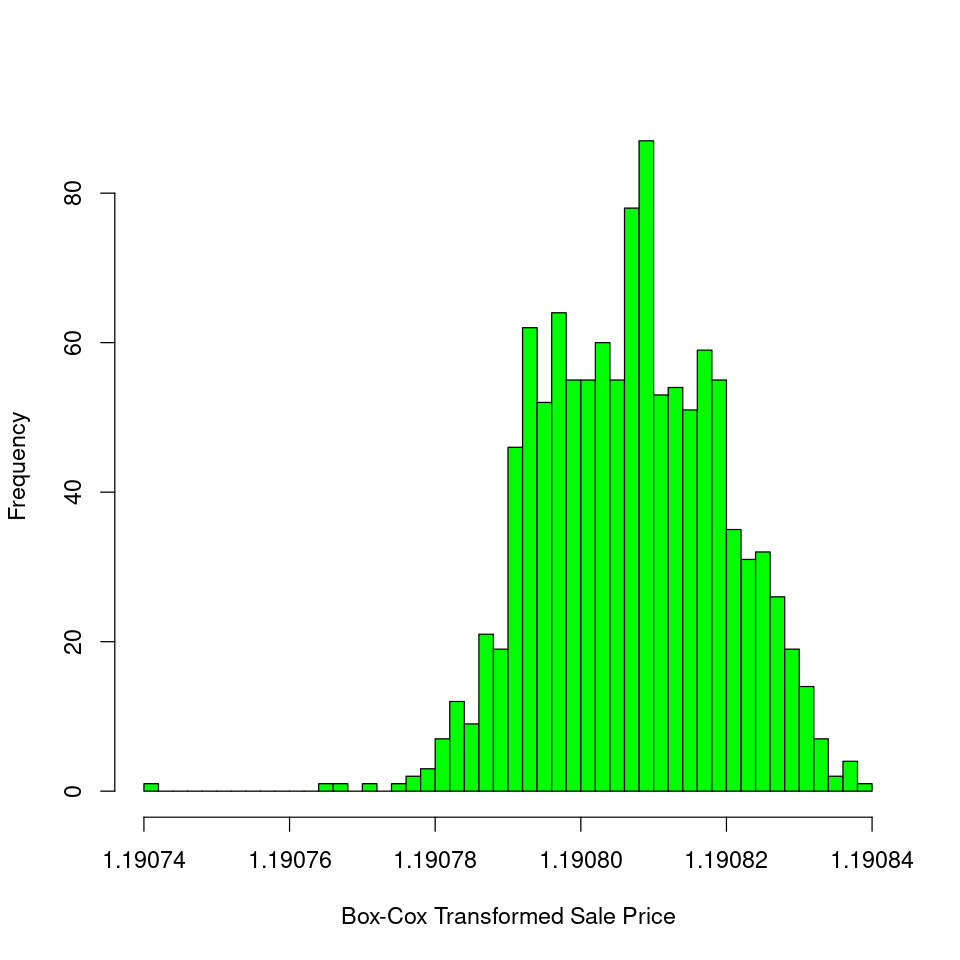

[1] -0.1184782

In [0]:
%r
# Use the optimal lambda to transform the data;
y.lambda <- BoxCox(processed_r$SalePrice, lambda=lambda.hat)

hist(y.lambda,xlab='Box-Cox Transformed Sale Price', main='', breaks=40, col='green')
skewness(y.lambda)